In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import re

%matplotlib inline

# In his own League

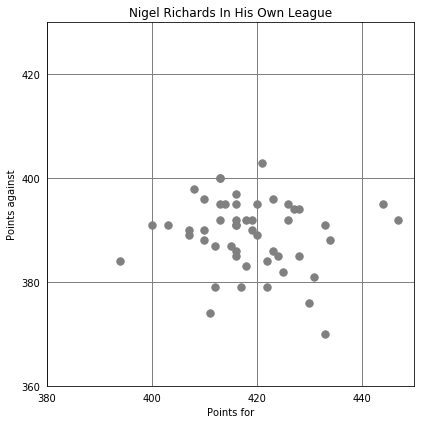

In [78]:
best_players = pd.read_csv("data/ranked-players-with-scores.csv")

best_players['current_rank'] = best_players['current_rank'].astype(int)
best_players['points_for'] = best_players['points_for_against'].str.extract(r'(\d+)\-\d+', expand=False).astype(int)
best_players['points_against'] = best_players['points_for_against'].str.extract(r'\-(\d+)', expand=False).astype(int)

# Create a smaller dataset with 50 best
fifty_best = best_players[best_players["current_rank"] <= 50]
# Graph
ax = fifty_best.plot(x='points_for', y='points_against', kind='scatter', figsize=(6,6), color='grey', s=55)
# Set ylim and xlim
plt.ylim(360,430)
plt.xlim(380,450)
# Set name of ticks on both axis
ax.set_xticks([380, 400, 420, 440])
ax.set_yticks([360, 380, 400, 420])
# Strip ticks
plt.tick_params(axis='x', which='both',bottom='off', top='off')
plt.tick_params(axis='y', which='both',left='off', right='off')
# Set title and labels of axis
ax.set_title("Nigel Richards In His Own League")
ax.set_ylabel("Points against")
ax.set_xlabel("Points for")
# Customize the grid
ax.grid(axis='both', which='major', linestyle='-', linewidth='1', color='grey')
# Save
plt.tight_layout()
plt.savefig("Best_players.pdf", transparent=True)

# In all leagues

In [60]:
# Read both files and merge on player id
tournament_scores = pd.read_csv("data/scrabble-tournament.csv")
points_spread = pd.read_csv('data/scrabble-point-spread.csv')
merged = tournament_scores.merge(points_spread, left_on='Player ID', right_on='player_id')
merged["points_against"] = merged["points_against"].astype(int)
merged["points_for"] = merged["points_for"].astype(int)

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,...,Seed,Spread,Ties,Tournament ID,Wins,division,player_id,points_against,points_for,tournament_id
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,...,1,1934,NaN,8163,24,Division 1,6003,381,443,8163
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,...,11,1868,NaN,8163,24,Division 1,20749,375,435,8163
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,...,2,1623,NaN,8163,23,Division 1,19535,391,443,8163
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,...,8,1628,NaN,8163,22,Division 1,18474,386,439,8163
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,...,5,1671,NaN,8163,21,Division 1,583,396,450,8163
5,NaN,NaN,10,Scott Appel,2001,1920.0,NaN,2177.0,6,55,...,27,746,NaN,8163,21,Division 1,55,400,424,8163
6,NaN,NaN,10,Mack Meller,2035,2014.0,NaN,2114.0,7,20383,...,9,397,1.0,8163,20,Division 1,20383,402,415,8163
7,NaN,NaN,11,Rafi Stern,2033,2030.0,NaN,2033.0,8,2105,...,3,960,NaN,8163,20,Division 1,2105,403,434,8163
8,NaN,NaN,11,Jesse Day,2022,2021.0,NaN,2028.0,9,10129,...,7,652,1.0,8163,19,Division 1,10129,398,419,8163
9,NaN,NaN,12,Dave Wiegand,2016,2000.0,NaN,2087.0,10,728,...,12,1153,NaN,8163,19,Division 1,728,386,424,8163


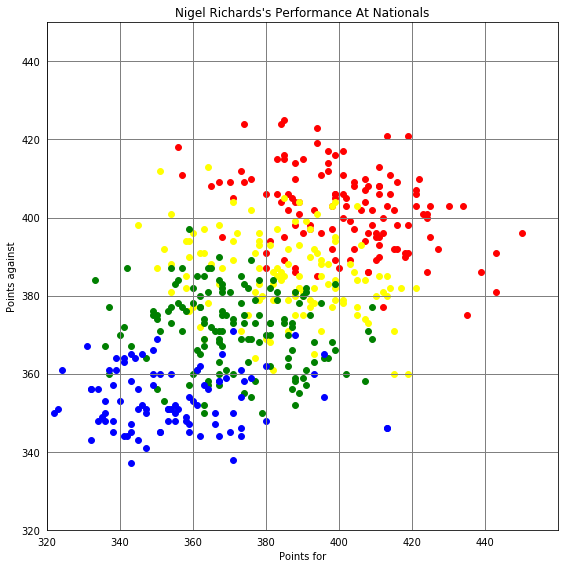

In [77]:
# Graph
fig, ax = plt.subplots(figsize=(8,8))
merged[merged['division'] == 'Division 1'].plot(kind = 'scatter', x='points_for', y='points_against', ax=ax, color='red', s=35)
merged[merged['division'] == 'Division 2'].plot(kind = 'scatter', x='points_for', y='points_against', ax=ax, color='yellow', s=35)
merged[merged['division'] == 'Division 3'].plot(kind = 'scatter', x='points_for', y='points_against', ax=ax, color='green', s=35)
merged[merged['division'] == 'Division 4'].plot(kind = 'scatter', x='points_for', y='points_against', ax=ax, color='blue', s=35)
# Set x and y limits
plt.ylim(320,450)
plt.xlim(320,460)
# Set name of ticks on both axis 
ax.set_xticks([320, 340, 360, 380, 400, 420, 440])
ax.set_yticks([320, 340, 360, 380, 400, 420, 440])
# Strip ticks
plt.tick_params(axis='x', which='both',bottom='off', top='off')
plt.tick_params(axis='y', which='both',left='off', right='off')
# Set title
ax.set_title("Nigel Richards's Performance At Nationals")
ax.set_ylabel("Points against")
ax.set_xlabel("Points for")
# Customize the grid
ax.grid(axis='both', which='major', linestyle='-', linewidth='1', color='grey')
# Save
plt.tight_layout()
plt.savefig("All_divisions.pdf", transparent=True)